In [1]:
import pandas as pd
import numpy as np
from plotnine import * 
import plotnine
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MAI0881/datasets/main/telecom_churn.csv', encoding = 'utf-8', sep = ',')
df

In [3]:
dfMatrix = df.loc[:,].to_numpy() #transforma o df em uma matriz
dfMatrix

In [4]:
# Lista para armazenar os custos (erros) de cada configuração de cluster
cost = []

for cluster in range(1, 20): # Loop sobre diferentes valores de cluster (de 1 a 20)
    try:
        kmodes = KModes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0) # Criação do objeto KModes com os parâmetros especificados
        kmodes.fit_predict(dfMatrix) # Aplica o algoritmo KModes aos dados dfMatrix e realiza a predição dos clusters
        cost.append(kmodes.cost_) # Armazena o custo (erro) da configuração atual na lista de custos
        
        print('Cluster initiation: {}'.format(cluster)) # printa uma mensagem para acompanhar a iteração atual
        
    except:
        
        break # Em caso de erro, interrompe o loop

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19


In [5]:
# Cria um DataFrame com duas colunas: 'Cluster' e 'Qualidade', contendo os valores de número de cluster e custo
df_cost = pd.DataFrame({'Cluster': range(1,20), 'Dissimilaridade': cost}) # Definição do range a ser testado

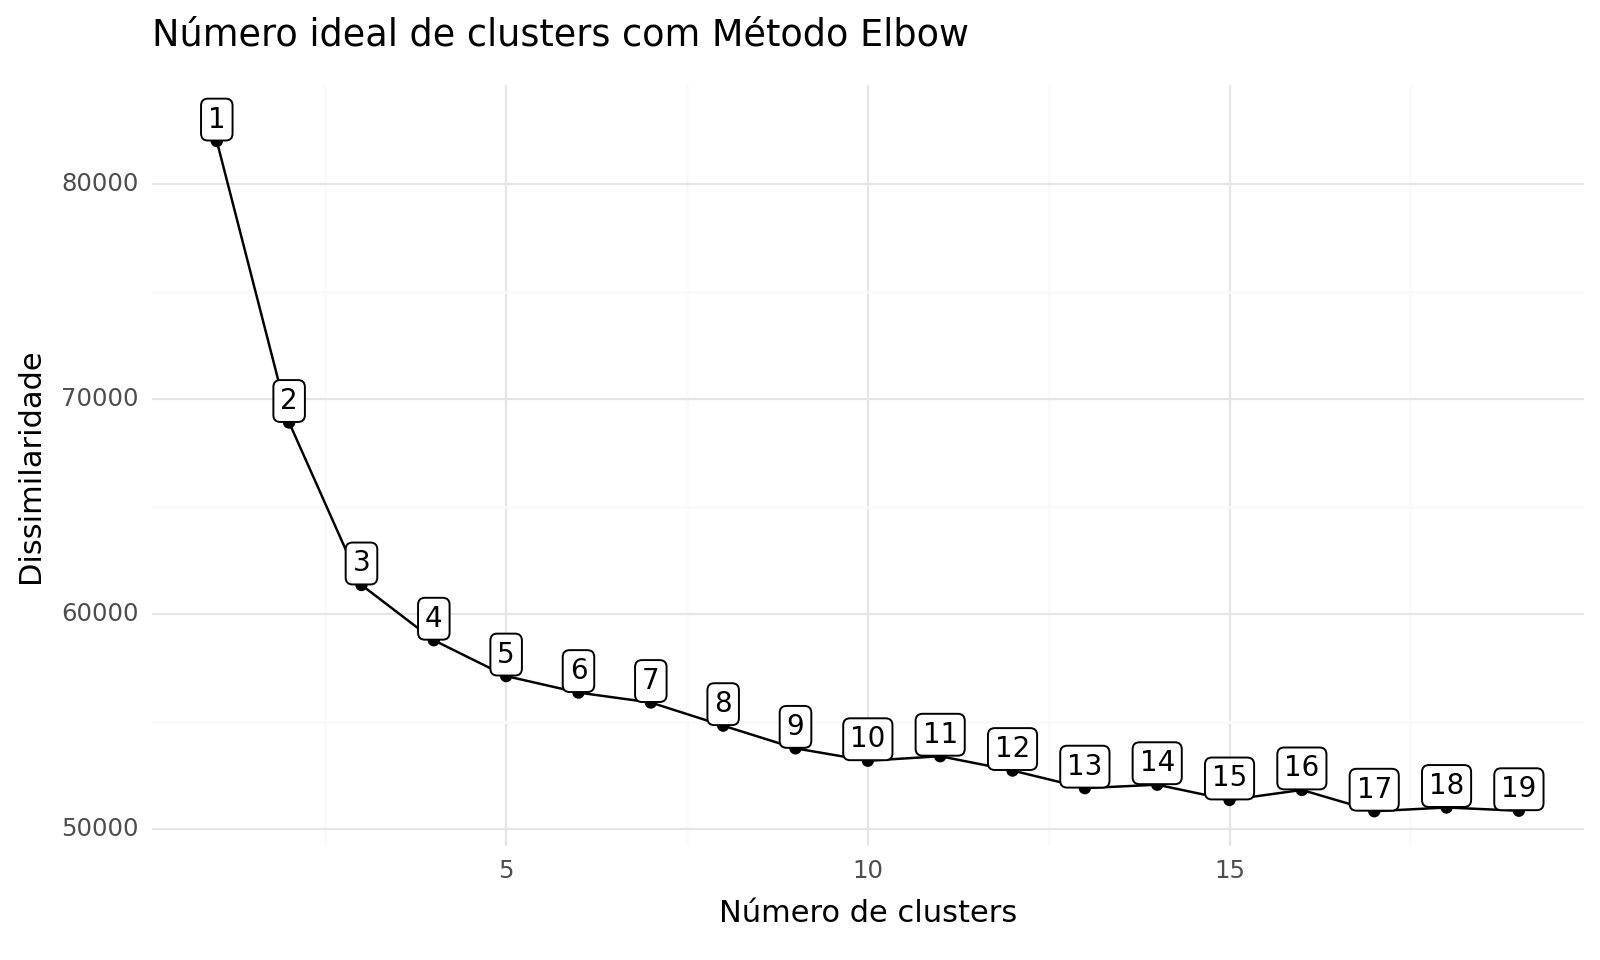

<Figure Size: (800 x 480)>

In [6]:
# Criação do gráfico para visualização utilizando a biblioteca plotnine
plotnine.options.figure_size = (8, 4.8)  # Define o tamanho da figura
(
    ggplot(data=df_cost) +  # DataFrame utilizado como dados do gráfico
    geom_line(aes(x='Cluster', y='Dissimilaridade')) +  # Linha que conecta os pontos do gráfico
    geom_point(aes(x='Cluster', y='Dissimilaridade')) +  # Pontos no gráfico
    geom_label(aes(x='Cluster', y='Dissimilaridade', label='Cluster'), size=10, nudge_y=1000) +  # Rótulos para cada ponto no gráfico
    labs(title='Número ideal de clusters com Método Elbow') +  # Título do gráfico
    xlab('Número de clusters') +  # Rótulo do eixo x
    ylab('Dissimilaridade') +  # Rótulo do eixo y
    theme_minimal()  # Estilo do gráfico
)

In [10]:
kmodes = KModes(n_jobs=-1, n_clusters=7, init='Huang', random_state=0) # Criação do objeto KModes com os parâmetros especificados
kmodes.fit_predict(dfMatrix) # Aplica o algoritmo KModes aos dados dfMatrix e realiza a predição dos clusters

array([4, 1, 5, ..., 4, 0, 6], dtype=uint16)

In [11]:
kmodes.cluster_centroids_ # Acessa os centroides dos clusters encontrados pelo algoritmo KModes
kmodes.n_iter_ # Retorna o número de iterações necessárias para o algoritmo convergir
kmodes.cost_ # Retorna o custo (erro) da clusterização obtida

55888.0

In [12]:
# Adiciona uma nova coluna 'Clusters Rótulos' ao DataFrame df com as atribuições de cluster feitas pelo algoritmo KModes
df['Clusters Rótulos'] = kmodes.labels_

# Mapeia os valores numéricos dos rótulos de cluster para rótulos descritivos
df['Segmento'] = df['Clusters Rótulos'].map({0: 'Primeiro', 1: 'Segundo', 2: 'Terceiro', 3: 'Quarto', 4: 'Quinto', 5: 'Sexto', 6: 'Sétimo'})

df['Segmento'] = df['Segmento'].astype('category') #mudando o tipo

# Reordena as categorias da coluna 'Segment' para seguir a ordem desejada
df['Segmento'] = df['Segmento'].cat.reorder_categories(['Primeiro', 'Segundo', 'Terceiro','Quarto','Quinto','Sexto','Sétimo'])

In [15]:
# Lista das colunas a serem selecionadas no DataFrame df
list_col = ['index', 'Segmento','Clusters Rótulos']

# Cria uma lista cols com as colunas que não estão na lista list_col
cols = [col for col in df if col not in list_col]

# Índices para as linhas do DataFrame que representam cada cluster


index = ['Primeiro', 'Segundo', 'Terceiro','Quarto','Quinto','Sexto','Sétimo']

# Cria um novo DataFrame com os centroides dos clusters obtidos pelo algoritmo KModes
# Utiliza as colunas selecionadas (cols) e os índices definidos (index)
df2 = pd.DataFrame(kmodes.cluster_centroids_, columns=cols, index=index)

#df2['Rótulos'] = ['Primeiro Cluster', 'Segundo Cluster', 'Terceiro Cluster']
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Primeiro,0013-EXCHZ,Female,1,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.4,1235.55,Yes
Segundo,0014-BMAQU,Male,0,Yes,No,72,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Credit card (automatic),64.4,1782,No
Terceiro,0030-FNXPP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,20.2,No
Quarto,0011-IGKFF,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.1,2317.1,No
Quinto,0003-MKNFE,Male,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.25,44,No
Sexto,0004-TLHLJ,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.35,45.3,Yes
Sétimo,0013-SMEOE,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),79.2,,No


In [16]:
# representatividade de cada cluster
cluster_counts = df['Clusters Rótulos'].value_counts()
cluster_percentages = cluster_counts / len(df) * 100
cluster_percentages = cluster_percentages.reset_index(drop=True)
cluster_percentages

0    21.666903
1    15.675138
2    15.149794
3    13.488570
4    11.855743
5    11.784751
6    10.379100
Name: count, dtype: float64